### Part 1 - Define the problem

####  --- 1 Define the problem ---

Problem Definition:
    HR wants to predict employee's salary based on factors like industry, years of experience, level of education, major, distance from metropolis.

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

__author__ = "Sathya Thiruvengadam"
__email__ = "thiruvengadam.sathya@gmail.com"

### Part 2 - Discover

#### --- 2 Load the data ---

In [2]:
#Load the data
train_features = pd.read_csv("data/train_features.csv")
train_salary = pd.read_csv("data/train_salaries.csv")

In [3]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_data = pd.merge(train_features, train_salary, on = 'jobId')
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [7]:
train_data.shape

(1000000, 9)

#### --- 3 Clean the data ---

In [8]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data[train_data['salary'] <= 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [11]:
train_data = train_data[train_data['salary'] > 0]
train_data.shape

(999995, 9)

#### --- 4 Explore the data (EDA) ---

In [12]:
train_data.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [13]:
train_data.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684552480,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


#### Check for outliers

<Figure size 1008x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='salary'>

Text(0.5, 1.0, 'Distribution of salary with outliers')

<AxesSubplot:>

<AxesSubplot:xlabel='salary', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of salary- target variable')

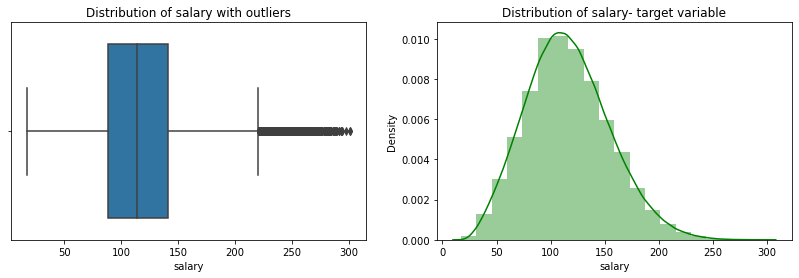

In [14]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.boxplot(x = train_data['salary'])
plt.title("Distribution of salary with outliers")
plt.subplot(1,2,2)
sns.distplot(train_data['salary'], bins=20, color = "Green")
plt.title("Distribution of salary- target variable")
plt.savefig("images/salary_outliers_dist.png")
plt.show()

In [15]:
# Verification on outliers
def cal_upper_lower(col):
    sorted(col)
    q1,q3 = col.quantile([0.25, 0.75])
    IQR = q3-q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    return upper, lower

highsal, lowsal = cal_upper_lower(train_data['salary'])
print("The upper and lower salary are {} and {} :" .format(highsal, lowsal))

The upper and lower salary are 220.5 and 8.5 :


In [16]:
train_data[train_data['salary'] > highsal ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [17]:
train_data.loc[train_data['salary'] > highsal, 'jobType' ].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [18]:
train_data.loc[(train_data['salary'] > highsal) & (train_data['jobType'] == 'JUNIOR'), 'industry'] .value_counts()

OIL        11
FINANCE     8
WEB         1
Name: industry, dtype: int64

The rows that are higher in salary are 'C' level position and those are in junior jobtype are tend to be with Doctoral degree and in highly paid industries like finance, oil and web, so the outlier are legitimate and decided to keep those data.

#### Visually exploring the relationship between the feature variables and the arget

In [19]:
def plot_cat_features(data, column):
    plt.figure(figsize = (14,4))
    if data[column].dtype != 'int64':
        #Change the data type to category and take the mean salary based on each category to plot 
        plt.subplot(1,2,1)
        mean = data.groupby(column)['salary'].mean()
        data[column] = data[column].astype("category")
        levels = mean.sort_values().index.tolist()
        data[column].cat.reorder_categories(levels, inplace=True)
        mean.sort_values().plot(kind="bar", color="grey")
        plt.xticks(rotation=45)
        plt.ylabel("The average salary for" + " " + column.capitalize() )
        plt.title("Average salary versus" + ' ' + column)
        
        plt.subplot(1,2,2)
        sns.violinplot(x=column, y='salary', data=data)
        plt.xticks(rotation=45)
        plt.ylabel("Salaries")
        plt.savefig('images/salary_vs_' + column + '.png')
        plt.show()
        
    if data[column].dtype == 'int64':
        mean_p = data.groupby(column)['salary'].mean()
        std_p = train_data.groupby(column)['salary'].std()
        mean_p.plot()
        plt.fill_between(range(len(std_p.index)), mean_p.values + std_p.values, mean_p.values - std_p.values, alpha=0.1)
        plt.savefig('images/salary_vs_' + column + '.png')

In [20]:
train_data_features=['jobType', 'degree', 'major', 'industry', 'yearsExperience','milesFromMetropolis']
train_data_cat_features=['jobType', 'degree', 'major', 'industry'] 
train_data_num_features=[]

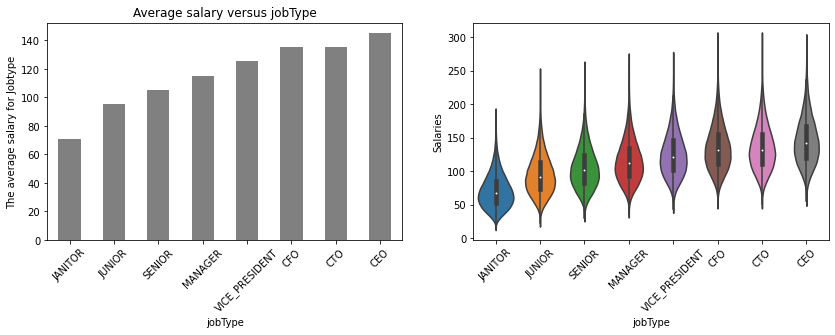

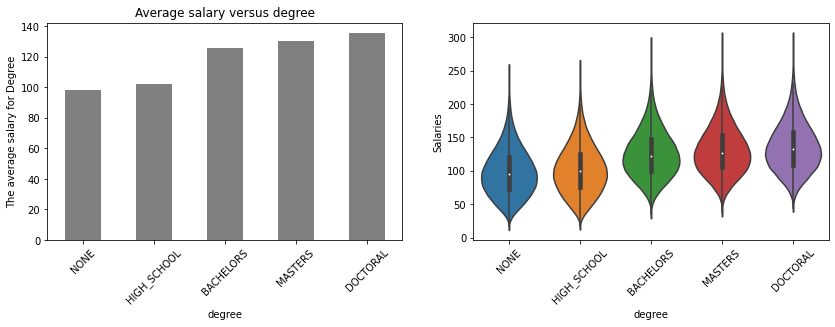

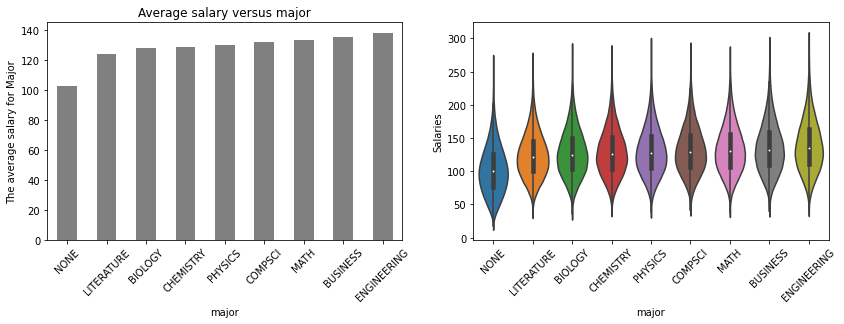

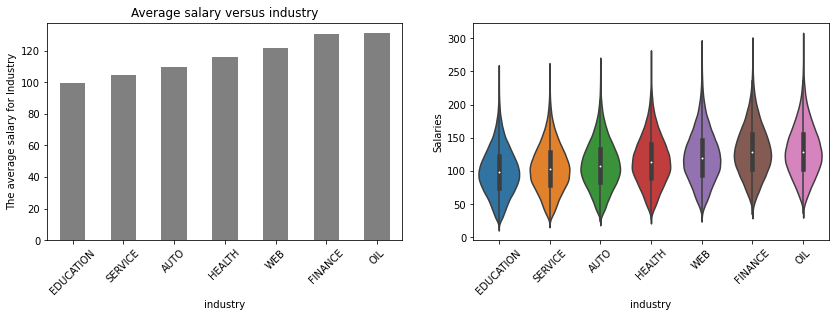

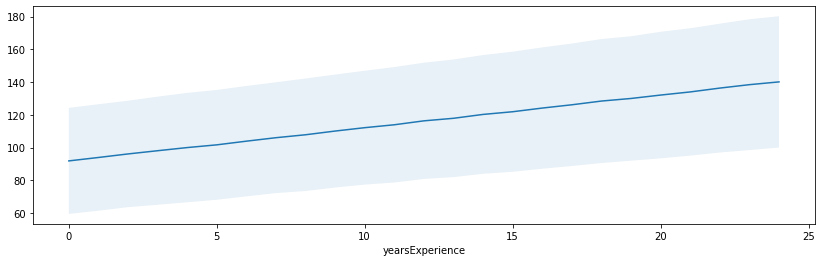

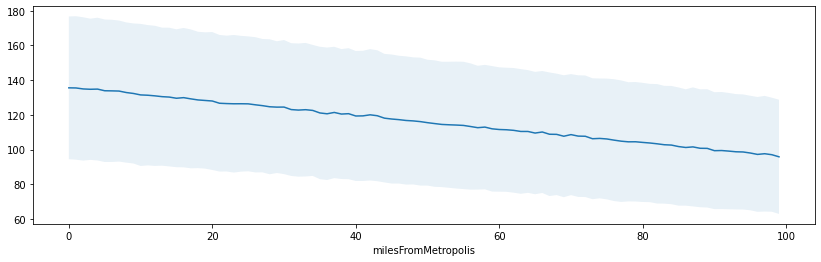

In [21]:
for feature in train_data_features:
    plot_cat_features(train_data, feature)

It indicates that the category variable- jobtype, degree, major and industry do have an impact in salary. Likewise, years of experience have a positive correlation with salary while miles from metropolis is negatively correlated.

In [22]:
# Label encoding for categorical variable to replace the value with mean salary fot that category
def l_encoding(data, column):
    dict = {}
    cat_list = data[column].cat.categories.tolist()
    for cat in cat_list:
        dict[cat] = data[data[column] == cat]['salary'].mean()
    data[column] = data[column].map(dict)

In [23]:
train_data_copy = train_data.copy()
for column in train_data_copy.columns:
    if train_data_copy[column].dtype.name == 'category':
        l_encoding(train_data_copy, column)
        train_data_copy[column] = train_data_copy[column].astype('float')

<Figure size 1008x432 with 0 Axes>

(7.5, -0.5)

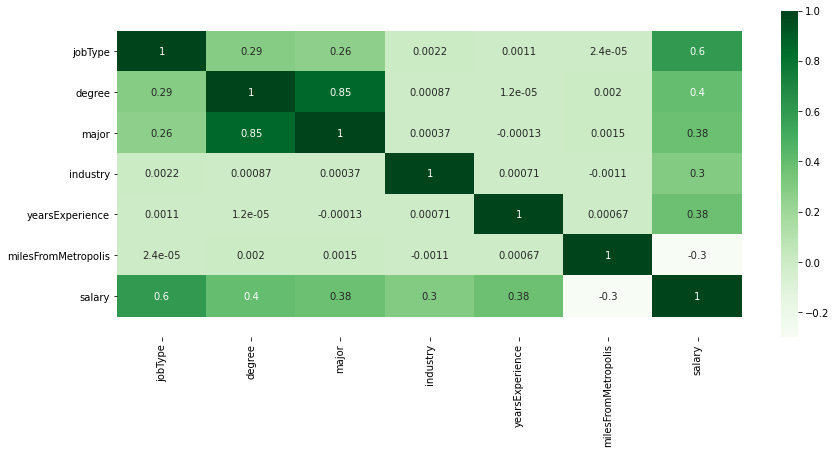

In [24]:
#Check for correlation
corrmat=train_data_copy.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,6))
ax=sns.heatmap(train_data_copy[top_corr_features].corr(), annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("images/corr.png")
plt.show()

#### --- 5 Establish a baseline model ---

In [25]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [26]:
mse = mean_squared_error(train_data_copy['jobType'], train_data_copy['salary'])
mse 

963.9252996562975

#### --- 6 Hypothesize solution ---

In [27]:
#Linear Regression
from sklearn.linear_model import LinearRegression  #  Basic regression model and straightforward
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor  # Low bias and low variance
# Extreme Gradient Boost
from xgboost import XGBRegressor  #Fast and high performance

### Part 3 - Develope

#### ---- 7 Engineer features ----

In [28]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

####  Feature Engineering

In [29]:
cat_variables = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis', 'salary']
feat_variables = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis'] 

In [30]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [31]:
# One-hot encoding for nominal variables
one_hot_var = ['jobType', 'major', 'industry']
train_data_dum = pd.get_dummies(train_data[one_hot_var], drop_first=True)
train_data_dum.head()

,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,major_LITERATURE,major_BIOLOGY,major_CHEMISTRY,...,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
#Label encoder for ordinal varibles - degree
train_data['degree'].replace({ 'NONE': 1, 'HIGH_SCHOOL': 2, 'BACHELORS': 3, 'MASTERS':4, 'DOCTORAL': 5}, inplace=True )
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,4,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,2,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,5,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,5,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,3,PHYSICS,FINANCE,8,16,163


In [33]:
y=train_data.iloc[:,-1]
y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [34]:
X=train_data.iloc[:,:-1]
X.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,4,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,2,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,5,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,5,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,3,PHYSICS,FINANCE,8,16


In [35]:
X = pd.concat([X, train_data_dum], axis=1)
X = X.drop(['jobId','companyId', 'jobType', 'major', 'industry'], axis=1)

In [36]:
X.head()

,degree,yearsExperience,milesFromMetropolis,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,...,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,4,10,83,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,3,73,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,5,10,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,8,17,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,8,16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
#train test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#### --- 8 Create Model ---

##### Linear Regression

In [38]:
li_reg = LinearRegression()
li_model = li_reg.fit(X_train, y_train)
li_pred = li_model.predict(X_test)

In [39]:
li_mse=mean_squared_error(y_test, li_pred)
li_mse

383.4560710070862

##### Random Forest 

In [40]:
rf_reg = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=30, min_samples_split=60, max_features='auto', verbose=0)

In [41]:
rf_model = rf_reg.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [42]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mse

366.52402643747297

#### XGBoost Regressor

In [43]:
xg_reg = XGBRegressor(n_estimators=80, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xg_model = xg_reg.fit(X_train,y_train)
xg_predict = xg_model.predict(X_test)

In [44]:
xg_mse=mean_squared_error(y_test, xg_predict)
xg_mse

358.5072654690308

#### --- 9 Test Models ---

In [45]:
#do 5-fold cross validation on models and measure MSE

In [46]:
#Linear regression with Cross_val
li_nmse = cross_val_score(li_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")

In [47]:
li_mse_cv = -1.0 * np.mean(li_nmse)
li_mse_cv

383.5177191567815

In [48]:
#Random Forest with Cross_val
rf_nmse = cross_val_score(rf_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
rf_mse_cv = -1.0 * np.mean(rf_nmse)
rf_mse_cv

378.28668888658814

In [49]:
from sklearn.model_selection import KFold

In [50]:
#Xgboost with Cross_val
folds = KFold(n_splits =5, shuffle = True, random_state=100)
xg_nmse = cross_val_score(xg_reg, X_test, y_test, cv=folds, scoring="neg_mean_squared_error")
xg_mse_cv = -1.0 * np.mean(xg_nmse)
xg_mse_cv

367.3066686586625

#### ---10 Select the best model ---

In [51]:
#select the model with the lowest error as your "production" model

In [52]:
results = {
    'Linear Regression' : [round(li_mse,2), round(li_mse_cv,2)],
    'Random Forest' : [round(rf_mse,2), round(rf_mse_cv,2)],
    'XGBoost' : [round(xg_mse,2), round(xg_mse_cv,2)]
}                                   
result_df = pd.DataFrame(results, index = ['Without Cross_val', 'With Cross_val'],)
result_df

,Linear Regression,Random Forest,XGBoost
Without Cross_val,383.46,366.52,358.51
With Cross_val,383.52,378.29,367.31


#### Hyperparameter Tunning 

Selected XGBoost model as have the low mean squared error compared to other models(Linear regression and Random Forest), Performed hyperparameter tunning for XGBoost.

In [53]:
#Number on trees in XGBoost
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
#Max number of levels in the tree
max_depth= [3, 4, 5, 6, 8, 10, 12, 15]
#Learnig rate
learning_rate=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
#gamma
gamma = [0.0,0.1,0.2,0.3,0.4]
#Subsample ratio of the training instance.
subsample=[0.3, 0.5, 0.7, 0.9, 1.0]
#Subsample ratio of columns when constructing each tree.
colsample_bytree=[0.3, 0.4, 0.5, 0.7]
#min_child_weight
min_child_weight = [1,3,5,7]
random_param={'n_estimators': n_estimators,
              'max_depth': max_depth,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight}
print(random_param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.3, 0.5, 0.7, 0.9, 1.0], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'min_child_weight': [1, 3, 5, 7]}


In [54]:
xg=XGBRegressor()
xg_randomcv=RandomizedSearchCV(estimator=xg,param_distributions=random_param,n_iter=5,cv=5,verbose=3,n_jobs=-1)
### fit the randomized model
xg_reg_ht = xg_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [55]:
xg_randomcv.best_params_

{'subsample': 0.9,
 'n_estimators': 600,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [56]:
xg_randomcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xg_pred1 = xg_reg_ht.predict(X_test)

In [58]:
xg_mse1 = mean_squared_error(y_test, xg_pred1)
xg_mse1

354.786000887062

In [59]:
XG_Hypertune = {
    'XGBoost_ Hyperparameter_tunning' : round(xg_mse1,2),
    } 

XG_Hypertune_df = pd.DataFrame(XG_Hypertune, index = ['Mean Squared Error'])
XG_Hypertune_df

,XGBoost_ Hyperparameter_tunning
Mean Squared Error,354.79


### Part 4 : Deploy

#### --- 11 Automate Pipelines ---

In [60]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

test_data = pd.read_csv("data/test_features.csv")

test_data.isnull().sum()
test_data.duplicated().sum()

# One-hot encoding for nominal variables
one_hot_var = ['jobType', 'major', 'industry']
test_data_dum = pd.get_dummies(test_data[one_hot_var], drop_first=True)

#Label encoder for ordinal varibles - degree
test_data['degree'].replace({ 'NONE': 1, 'HIGH_SCHOOL': 2, 'BACHELORS': 3, 'MASTERS':4, 'DOCTORAL': 5}, inplace=True )

test_data = pd.concat([test_data, test_data_dum], axis=1)
test_df = test_data.drop(['jobId','companyId', 'jobType', 'major', 'industry'], axis=1)
test_df.head()

#Run the prediction
test_pred = xg_reg_ht.predict(test_df)


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

0

,degree,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,2,22,73,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,20,47,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,17,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,14,96,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,10,44,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362685407687,COMP33,MANAGER,2,NONE,HEALTH,22,73,0,0,...,0,0,1,0,0,0,1,0,0,0
1,JOB1362685407688,COMP13,JUNIOR,1,NONE,AUTO,20,47,0,0,...,0,0,1,0,0,0,0,0,0,0
2,JOB1362685407689,COMP10,CTO,4,BIOLOGY,HEALTH,17,9,0,1,...,0,0,0,0,0,0,1,0,0,0
3,JOB1362685407690,COMP21,MANAGER,2,NONE,OIL,14,96,0,0,...,0,0,1,0,0,0,0,1,0,0
4,JOB1362685407691,COMP36,JUNIOR,5,BIOLOGY,OIL,10,44,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
prediction=pd.DataFrame(test_pred, columns= ['Prediction'])
predicted_salary=pd.concat([test_data['jobId'], prediction], axis=1)
predicted_salary.head()

,jobId,Prediction
0,JOB1362685407687,138.182236
1,JOB1362685407688,116.894569
2,JOB1362685407689,135.585800
3,JOB1362685407690,117.391464
4,JOB1362685407691,134.771408


#### --- 12 Deployment ---

In [63]:
#saved the prediction from test data to *.csv file
predicted_salary.to_csv("predictedsalary_out.csv", index =False)

In [64]:
# Created pickle file for deployment

import pickle
# Saving model to disk
pickle.dump(xg_reg_ht, open('model1.pkl','wb'))

In [65]:
from sklearn.ensemble import ExtraTreesRegressor

In [66]:
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [67]:
selection.feature_importances_

array([0.16380295, 0.19154223, 0.21486829, 0.03914584, 0.03257786,
       0.03237222, 0.03528785, 0.04234997, 0.03979821, 0.06879192,
       0.0047753 , 0.00490304, 0.00501933, 0.00498104, 0.00475652,
       0.00561837, 0.00686303, 0.00831155, 0.00333498, 0.00435053,
       0.00951962, 0.01651903, 0.03112659, 0.02938374])

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

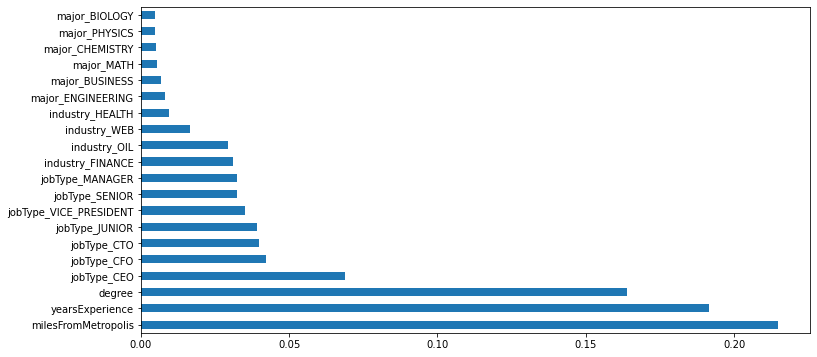

In [68]:
plt.figure(figsize = (12,6))
feat_import = pd.Series(selection.feature_importances_, index = X.columns)
feat_import.nlargest(20).plot(kind='barh')
plt.savefig("images/feature_importance.png")
plt.show()